In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import numpy as np
import yaml
import os
os.chdir("../")
from datasets.CrossDomain import CrossDomain
from datasets.Coco import Coco


In [34]:
with open("/home/topkech/work/pytorch-superpoint/configs/cross_domain_train.yaml", "r") as f:
# with open("/home/topkech/work/pytorch-superpoint/configs/superpoint_coco_train_heatmap.yaml", "r") as f:
    config = yaml.safe_load(f)


load labels from:  logs/export_magicpoint_crossdomain_nooam_lowthresh/predictions/train
dict_keys(['image', 'image_cross_domain', 'name', 'points', 'valid_mask', 'labels_2D', 'labels_res', 'warped_labels_gaussian', 'warped_labels_bi', 'warped_img', 'warped_labels', 'warped_res', 'warped_valid_mask', 'homographies', 'inv_homographies', 'labels_2D_gaussian'])


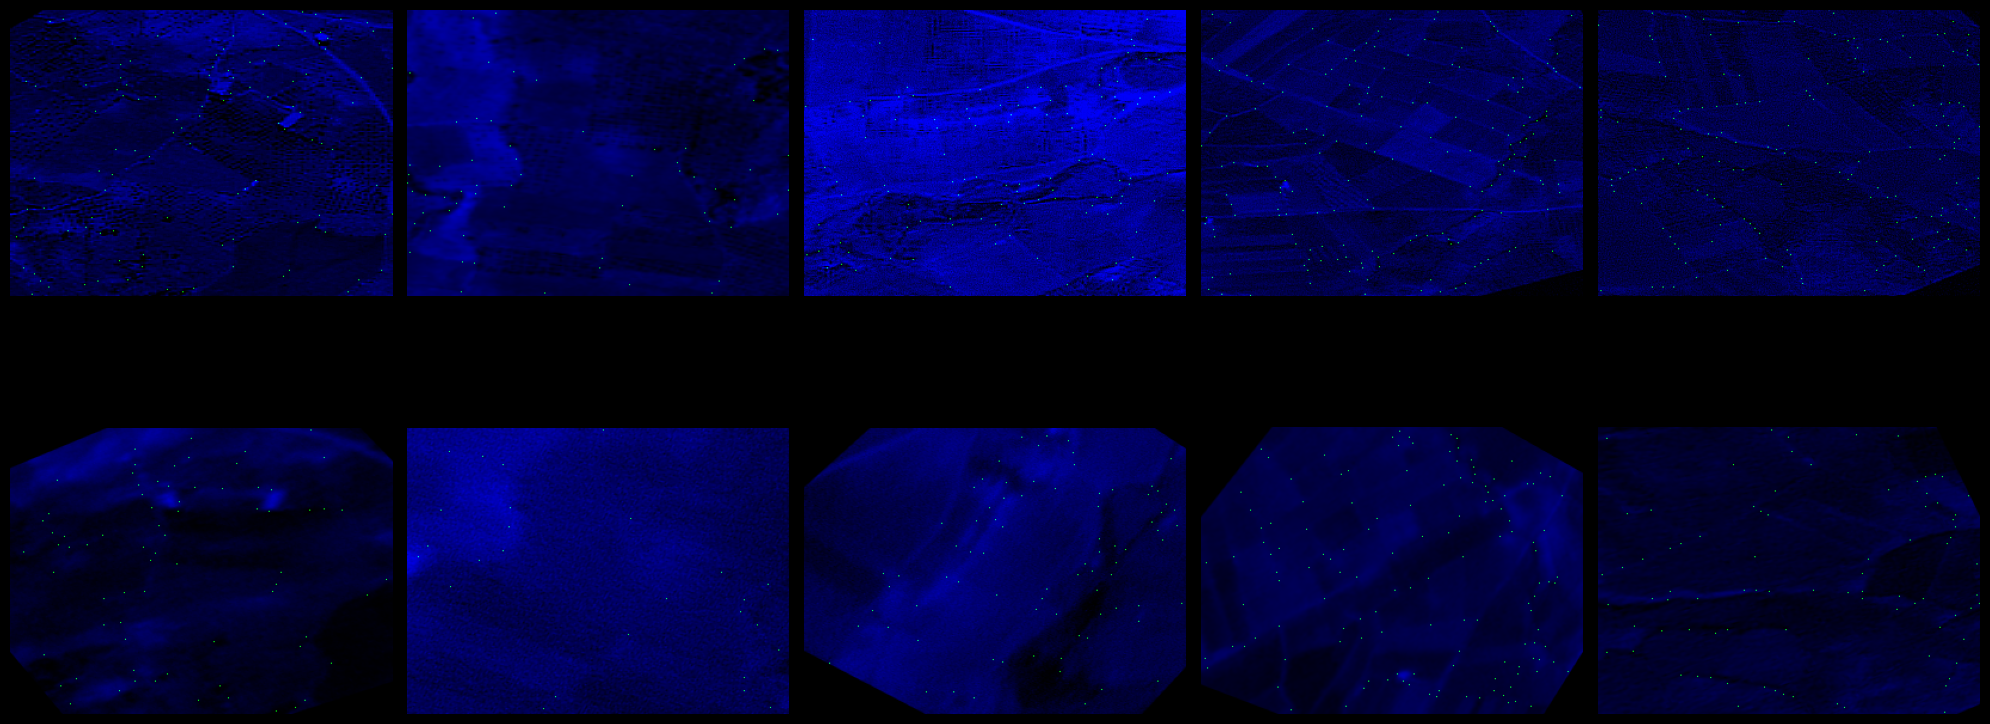

In [45]:
cd = CrossDomain(task="train", **config["data"])
print(cd[0].keys())
fig, axs = plt.subplots(2, 5, figsize=(20,10))
for axi, i in enumerate(range(110,115)):
    ex = cd[i]
    im = ex["image"][0][...,np.newaxis]
    im = np.dstack([np.zeros_like(im), ex["labels_2D_gaussian"][0][...,np.newaxis], im])

    axs[0][axi].imshow(im)
    warped_im = ex["warped_img"][0][...,np.newaxis]
    warped_im = np.dstack([np.zeros_like(warped_im), ex["warped_labels_gaussian"][0][...,np.newaxis], warped_im])
    axs[1][axi].imshow(warped_im)
    axs[0][axi].set_axis_off()
    axs[1][axi].set_axis_off()
plt.tight_layout()


In [52]:
ex["labels_2D_gaussian"].max()


tensor(1.)